# Nutrition Level Analysis
- I want to compare **"NutritionID"** to **"FAType"**
- NutritionID: Value associated with each product to show how nutritious a a specific product is. (Higher the number the more nutrious the product is.)


In [21]:
# to read and visualize spatial data
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [8]:
# Open data
df = pd.read_csv("./data/Ryo_GPCFB_DistirbutePounds_Dataset_r2.csv") 

/var/folders/wh/0plfxjrx4_g92p5l2k1ntcn80000gn/T/ipykernel_23710/3351053178.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/Ryo_GPCFB_DistirbutePounds_Dataset_r2.csv")


In [9]:
df.head()

,OrderID,OrderRef,AgencyID,AgencyRef,City,Zip,AgencyGroup,County,PickUpDate,OrderWeight,...,ProductWeight,ProductCategory,ProductQuantity,FAType,Storage,ShipViaID,ProductName,SumPCost,QPRGroup,A2HProdCatRef
0,134576.0,434282,926,GPCF2078-1,NaN,NaN,LC-DIST,LAWRENCE,1/3/2019 8:00,10760.0,...,400,PUR,40,06-Meals/Entrees/Soups,DRY,DEL NO FEE,Soup Chicken & Rice EZO,254,2 Purchased,OTHER
1,134576.0,434282,926,GPCF2078-1,NaN,NaN,LC-DIST,LAWRENCE,1/3/2019 8:00,10760.0,...,496,PUR,16,24-Rice,DRY,DEL NO FEE,Rice White Long Grain,207.84,2 Purchased,OTHER
2,134576.0,434282,926,GPCF2078-1,NaN,NaN,LC-DIST,LAWRENCE,1/3/2019 8:00,10760.0,...,504,PUR,24,21-Pasta,DRY,DEL NO FEE,Pasta Spaghetti,178.8,2 Purchased,OTHER
3,134576.0,434282,926,GPCF2078-1,NaN,NaN,LC-DIST,LAWRENCE,1/3/2019 8:00,10760.0,...,520,PUR,20,06-Meals/Entrees/Soups,DRY,DEL NO FEE,Meal Ravioli w/Beef EZO,251.4,2 Purchased,OTHER
4,134576.0,434282,926,GPCF2078-1,NaN,NaN,LC-DIST,LAWRENCE,1/3/2019 8:00,10760.0,...,520,PUR,20,27-Vegetables Canned/Frozen,DRY,DEL NO FEE,Vegetable Peas Sweet,203.8,2 Purchased,OTHER


In [10]:
df.describe()

,OrderID,OrderWeight,NutritionID
count,491106.000000,491106.000000,491106.000000
mean,192551.468243,63.496705,222.623875
std,33924.902004,338.522047,1470.298068
min,134576.000000,-720.000000,-177390.000000
25%,163872.250000,5.000000,22.500000
50%,189093.000000,5.000000,60.000000
75%,221123.000000,6.000000,160.000000
max,252997.000000,10760.000000,499999.000000


In [16]:
# check dtype of "NutritionID" and "FAType"
df.dtypes

OrderID            float64
OrderRef            object
AgencyID            object
AgencyRef           object
City                object
Zip                 object
AgencyGroup         object
County              object
PickUpDate          object
OrderWeight        float64
NutritionID        float64
ProductWeight       object
ProductCategory     object
ProductQuantity     object
FAType              object
Storage             object
ShipViaID           object
ProductName         object
SumPCost            object
QPRGroup            object
A2HProdCatRef       object
dtype: object

In [15]:
# df = df.astype({'OrderID': int})
# df = df.astype({'Zip': int})
# df = df.astype({'ProductWeight': float})

In [17]:
# 
df_ = df[["NutritionID", "FAType"]]

In [18]:
df_.head()

,NutritionID,FAType
0,6.0,06-Meals/Entrees/Soups
1,2.0,24-Rice
2,2.0,21-Pasta
3,2.0,06-Meals/Entrees/Soups
4,6.0,27-Vegetables Canned/Frozen


In [22]:
# Graph design
plt.style.use("ggplot")  
sns.set_palette('Set2')  

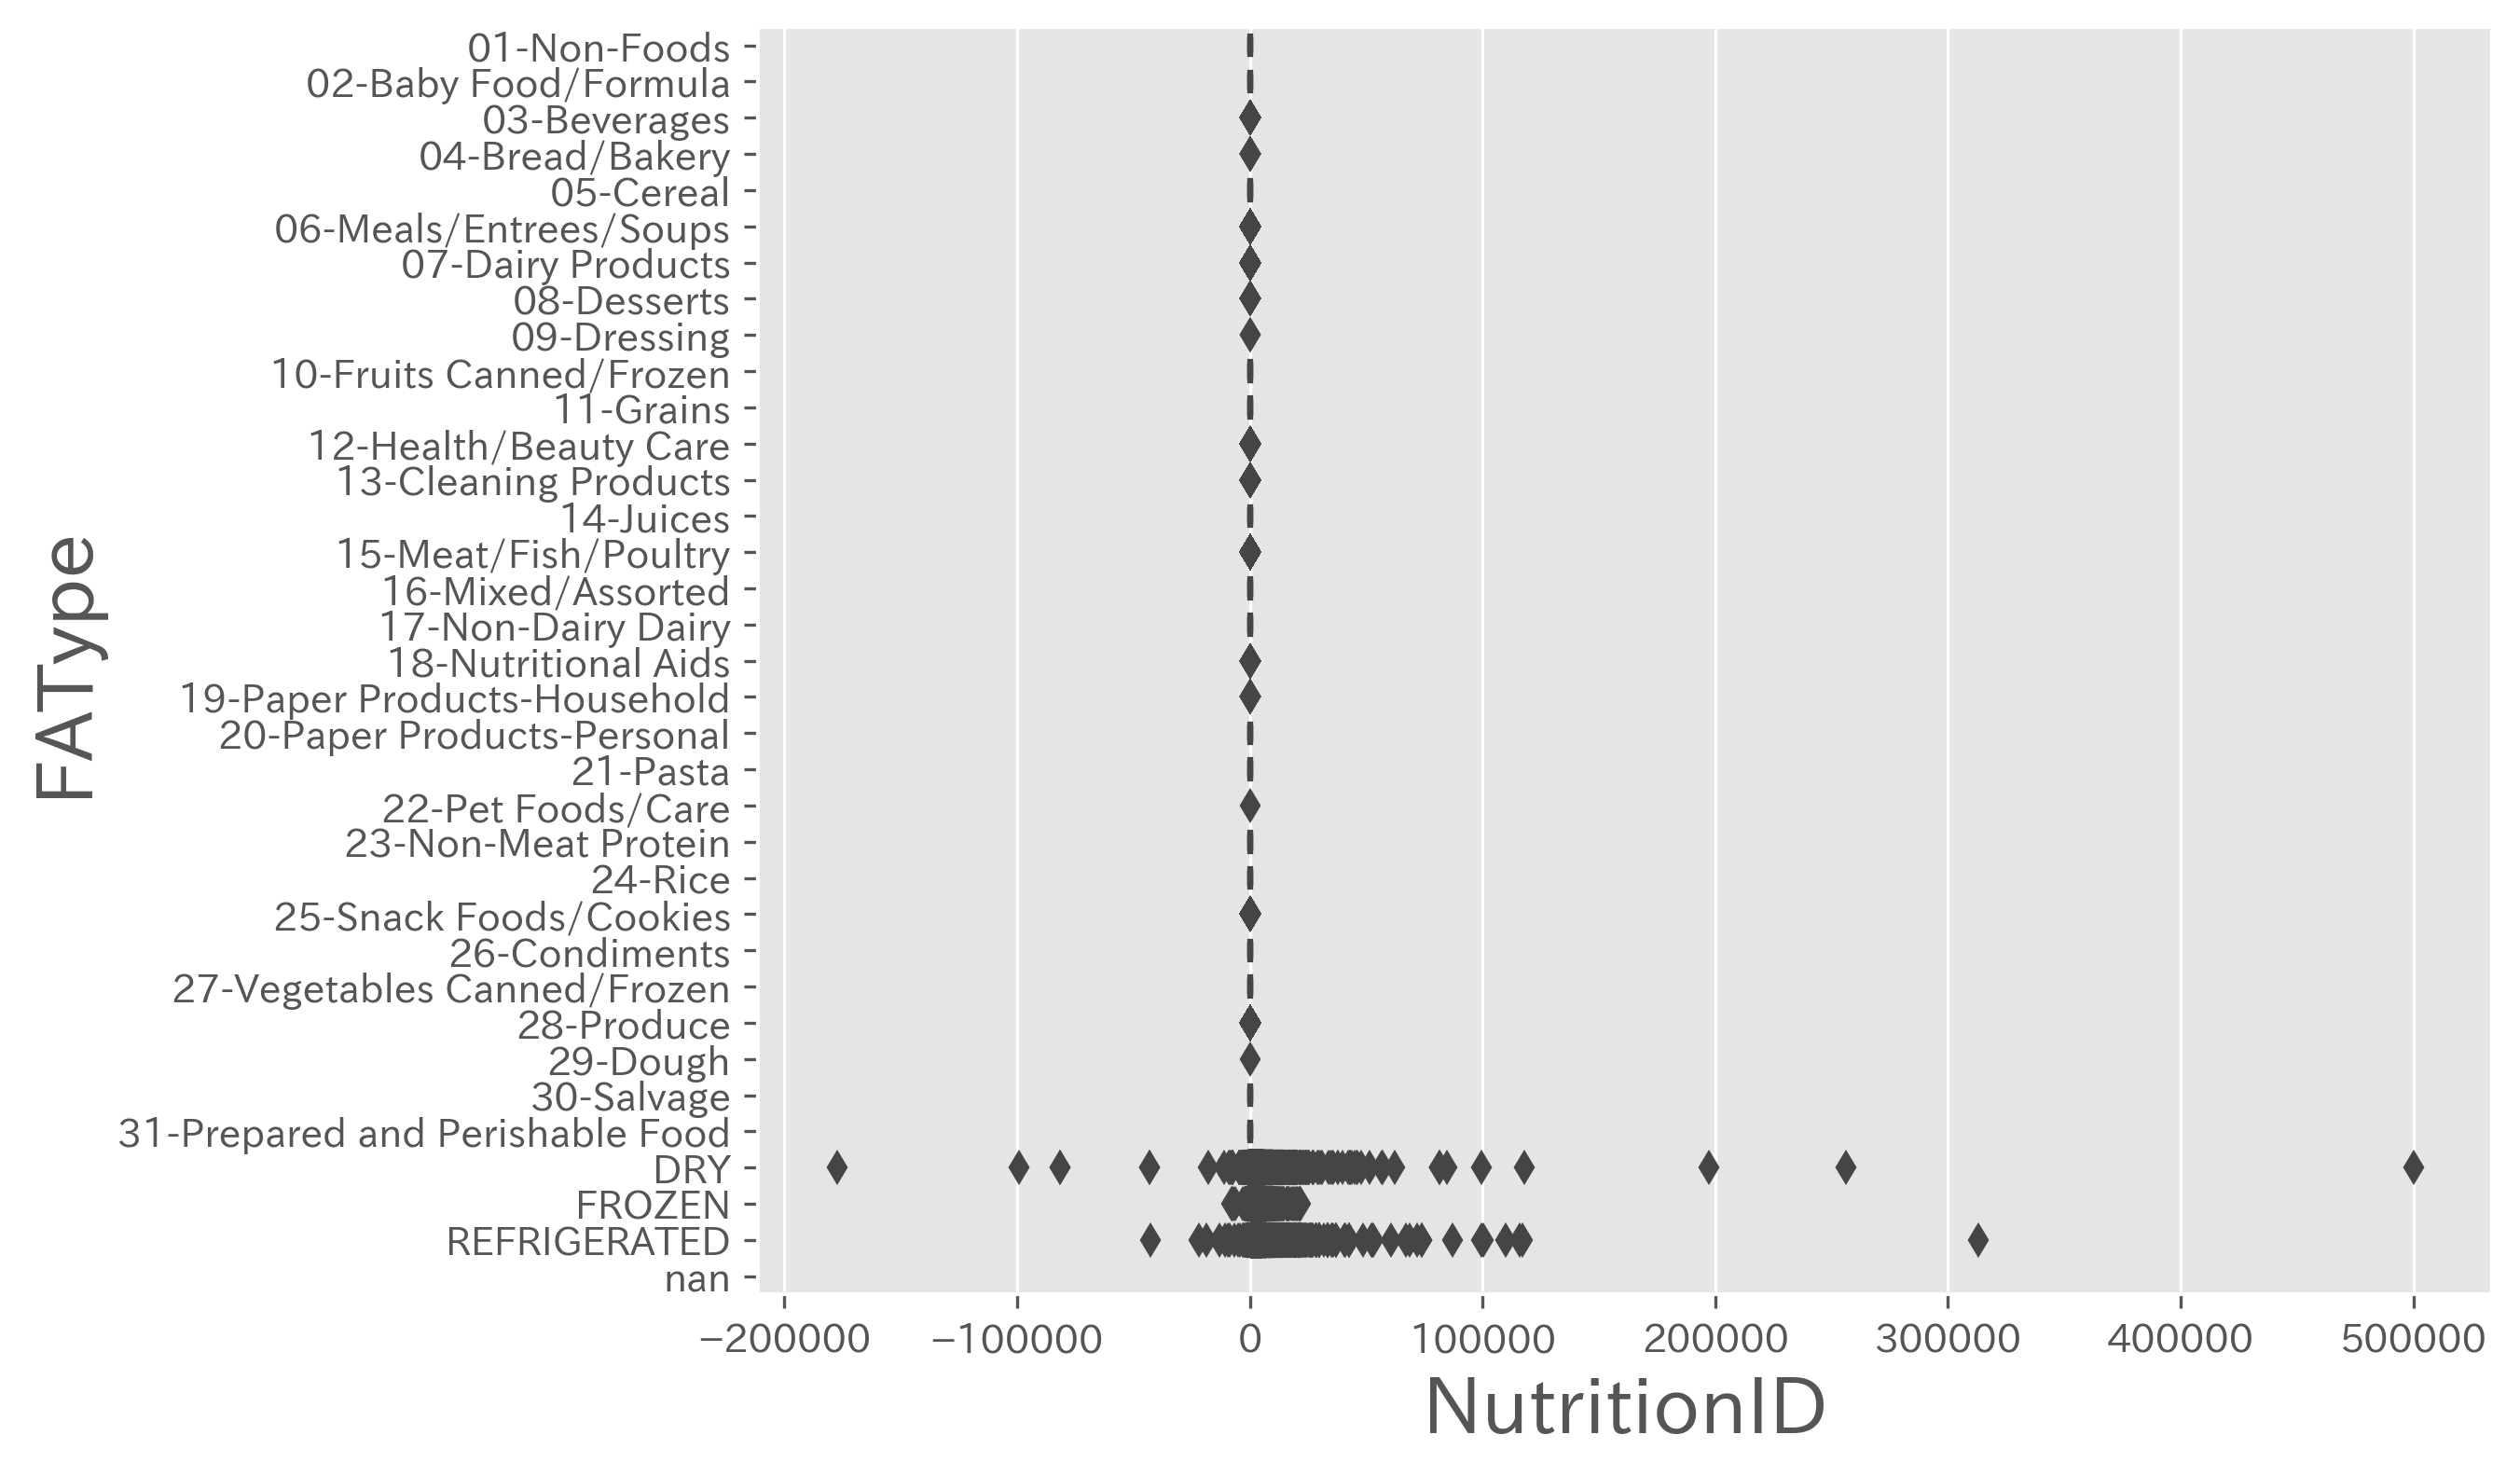

In [36]:
plt.figure(figsize=(8,6), dpi=300)

# sns.boxplot(x=df["FAType"], y=df["NutritionID"],width=0.5,order=df.FAType.unique())
sns.boxplot(x=df["NutritionID"], y=df["FAType"],width=0.5,order=df.sort_values('FAType').FAType.unique())

plt.title("",fontsize=20)  
plt.ylabel("FAType",fontsize=20) 
plt.xlabel("NutritionID",fontsize=20) 
plt.show()


In [35]:
df.sort_values('FAType').FAType.unique()

array(['01-Non-Foods', '02-Baby Food/Formula', '03-Beverages',
       '04-Bread/Bakery', '05-Cereal', '06-Meals/Entrees/Soups',
       '07-Dairy Products', '08-Desserts', '09-Dressing',
       '10-Fruits Canned/Frozen', '11-Grains', '12-Health/Beauty Care',
       '13-Cleaning Products', '14-Juices', '15-Meat/Fish/Poultry',
       '16-Mixed/Assorted', '17-Non-Dairy Dairy', '18-Nutritional Aids',
       '19-Paper Products-Household', '20-Paper Products-Personal',
       '21-Pasta', '22-Pet Foods/Care', '23-Non-Meat Protein', '24-Rice',
       '25-Snack Foods/Cookies', '26-Condiments',
       '27-Vegetables Canned/Frozen', '28-Produce', '29-Dough',
       '30-Salvage', '31-Prepared and Perishable Food', 'DRY', 'FROZEN',
       'REFRIGERATED', nan], dtype=object)

In [37]:
# Eliminate rows has 'DRY', 'FROZEN','REFRIGERATED' and nan" FAType
# because too much variance to make a boxplot.
df_ = df
df_ = df_[df_["FAType"]!="DRY"]
df_ = df_[df_["FAType"]!="FROZEN"]
df_ = df_[df_["FAType"]!="REFRIGERATED"]
df_ = df_[df_["FAType"]!="nan"]

In [38]:
df_.head()

,OrderID,OrderRef,AgencyID,AgencyRef,City,Zip,AgencyGroup,County,PickUpDate,OrderWeight,...,ProductWeight,ProductCategory,ProductQuantity,FAType,Storage,ShipViaID,ProductName,SumPCost,QPRGroup,A2HProdCatRef
0,134576.0,434282,926,GPCF2078-1,NaN,NaN,LC-DIST,LAWRENCE,1/3/2019 8:00,10760.0,...,400,PUR,40,06-Meals/Entrees/Soups,DRY,DEL NO FEE,Soup Chicken & Rice EZO,254,2 Purchased,OTHER
1,134576.0,434282,926,GPCF2078-1,NaN,NaN,LC-DIST,LAWRENCE,1/3/2019 8:00,10760.0,...,496,PUR,16,24-Rice,DRY,DEL NO FEE,Rice White Long Grain,207.84,2 Purchased,OTHER
2,134576.0,434282,926,GPCF2078-1,NaN,NaN,LC-DIST,LAWRENCE,1/3/2019 8:00,10760.0,...,504,PUR,24,21-Pasta,DRY,DEL NO FEE,Pasta Spaghetti,178.8,2 Purchased,OTHER
3,134576.0,434282,926,GPCF2078-1,NaN,NaN,LC-DIST,LAWRENCE,1/3/2019 8:00,10760.0,...,520,PUR,20,06-Meals/Entrees/Soups,DRY,DEL NO FEE,Meal Ravioli w/Beef EZO,251.4,2 Purchased,OTHER
4,134576.0,434282,926,GPCF2078-1,NaN,NaN,LC-DIST,LAWRENCE,1/3/2019 8:00,10760.0,...,520,PUR,20,27-Vegetables Canned/Frozen,DRY,DEL NO FEE,Vegetable Peas Sweet,203.8,2 Purchased,OTHER


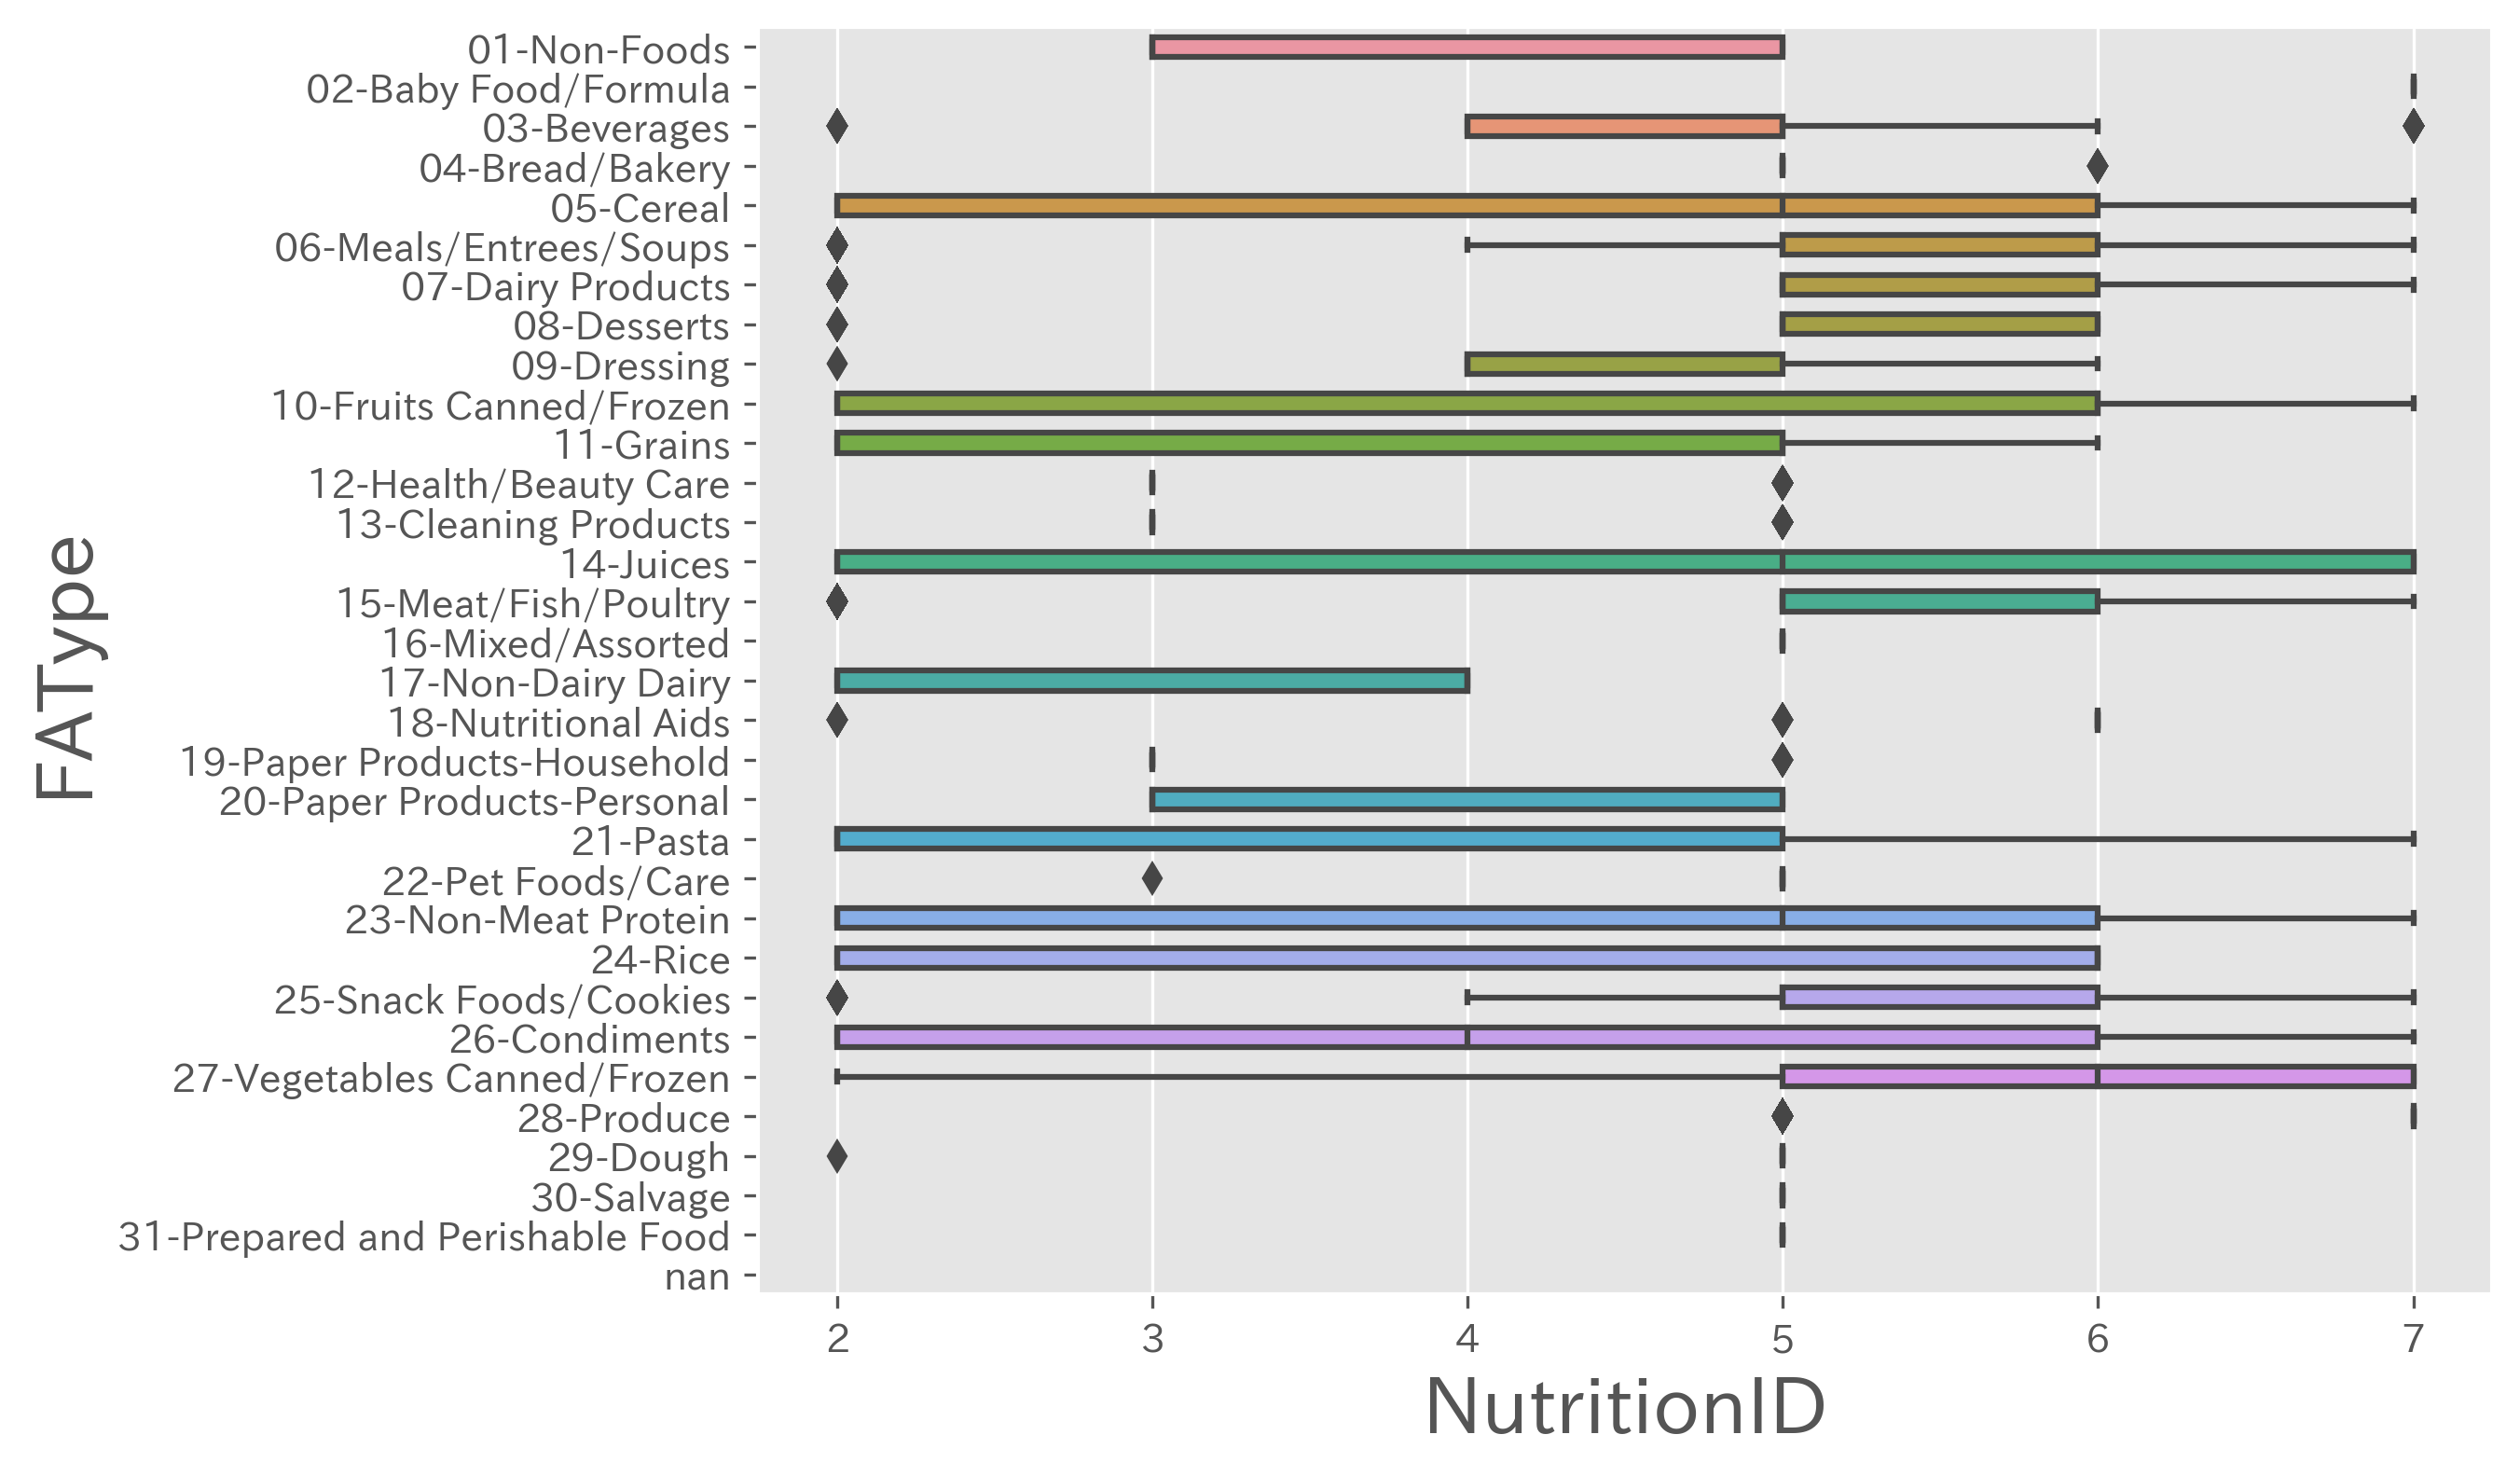

In [39]:
# boxplot

plt.figure(figsize=(8,6), dpi=300)

sns.boxplot(x=df_["NutritionID"], y=df_["FAType"],width=0.5,order=df_.sort_values('FAType').FAType.unique())

plt.title("",fontsize=20)  
plt.ylabel("FAType",fontsize=20) 
plt.xlabel("NutritionID",fontsize=20) 
plt.show()


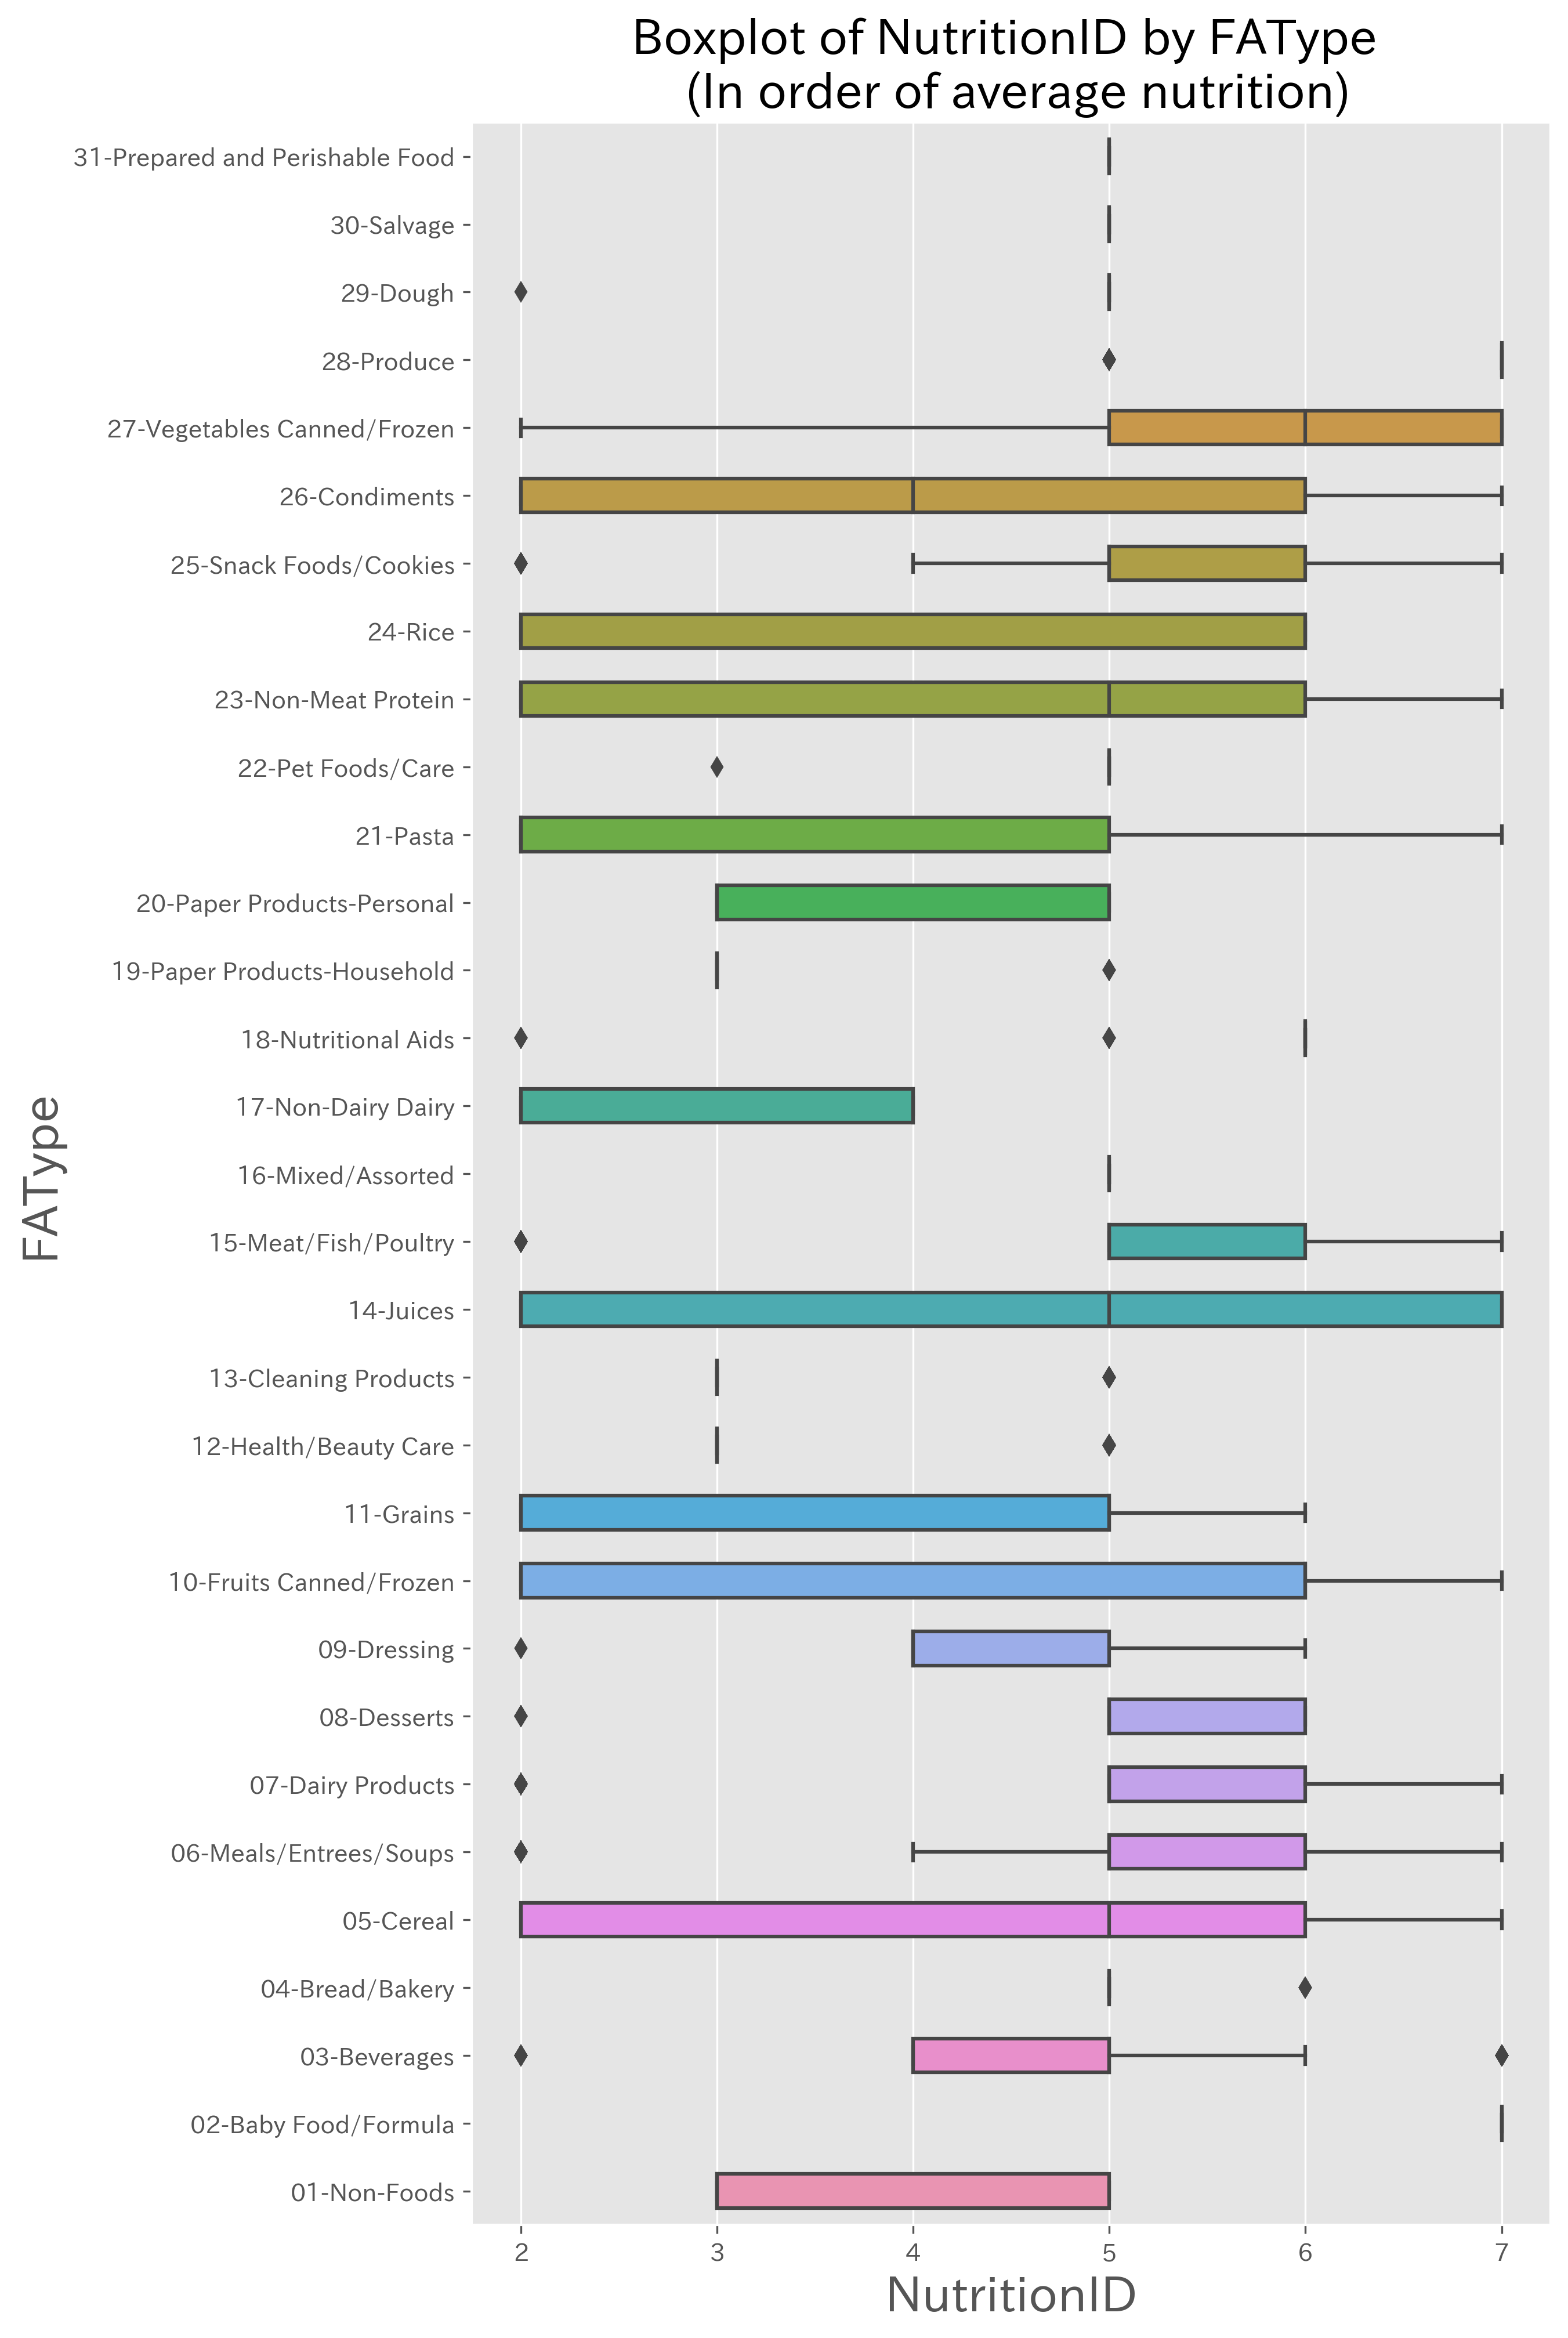

In [66]:
# boxplot

plt.figure(figsize=(8,16), dpi=300)

# Find the order
my_order = df_.groupby(by=["FAType"])["NutritionID"].median().iloc[::-1].index

sns.boxplot(x=df_["NutritionID"], y=df_["FAType"],width=0.5,order=my_order)

plt.title("Boxplot of NutritionID by FAType \n (In order of average nutrition)",fontsize=20)  
plt.ylabel("FAType",fontsize=20) 
plt.xlabel("NutritionID",fontsize=20) 

# save image
import datetime
now = datetime.datetime.now()
filename = './output/graph_' + now.strftime('%Y%m%d_%H%M%S') + '.png'
plt.savefig(filename, dpi = 300)

plt.show()


In [48]:
df_["NutritionID"].median()

5.0

In [53]:

print("aa", df_[df_["FAType"] == "31-Prepared and Perishable Food"]["NutritionID"].median())

aa 5.0


In [84]:
l_ = []
print("Median NutritionID by FATye")
for i in range(len(df_.sort_values('FAType').FAType.unique())):
    fatype = df_.sort_values('FAType').FAType.unique()[i]
    print(fatype, df_[df_["FAType"] == fatype]["NutritionID"].median())
    l_.append([df_[df_["FAType"] == fatype]["NutritionID"].median(), fatype])

Median NutritionID by FATye
01-Non-Foods 3.0
02-Baby Food/Formula 7.0
03-Beverages 5.0
04-Bread/Bakery 5.0
05-Cereal 5.0
06-Meals/Entrees/Soups 5.0
07-Dairy Products 5.0
08-Desserts 5.0
09-Dressing 4.0
10-Fruits Canned/Frozen 6.0
11-Grains 5.0
12-Health/Beauty Care 3.0
13-Cleaning Products 3.0
14-Juices 5.0
15-Meat/Fish/Poultry 5.0
16-Mixed/Assorted 5.0
17-Non-Dairy Dairy 4.0
18-Nutritional Aids 6.0
19-Paper Products-Household 3.0
20-Paper Products-Personal 3.0
21-Pasta 2.0
22-Pet Foods/Care 5.0
23-Non-Meat Protein 5.0
24-Rice 6.0
25-Snack Foods/Cookies 5.0
26-Condiments 4.0
27-Vegetables Canned/Frozen 6.0
28-Produce 7.0
29-Dough 5.0
30-Salvage 5.0
31-Prepared and Perishable Food 5.0
nan nan


In [85]:
l_

[[3.0, '01-Non-Foods'],
 [7.0, '02-Baby Food/Formula'],
 [5.0, '03-Beverages'],
 [5.0, '04-Bread/Bakery'],
 [5.0, '05-Cereal'],
 [5.0, '06-Meals/Entrees/Soups'],
 [5.0, '07-Dairy Products'],
 [5.0, '08-Desserts'],
 [4.0, '09-Dressing'],
 [6.0, '10-Fruits Canned/Frozen'],
 [5.0, '11-Grains'],
 [3.0, '12-Health/Beauty Care'],
 [3.0, '13-Cleaning Products'],
 [5.0, '14-Juices'],
 [5.0, '15-Meat/Fish/Poultry'],
 [5.0, '16-Mixed/Assorted'],
 [4.0, '17-Non-Dairy Dairy'],
 [6.0, '18-Nutritional Aids'],
 [3.0, '19-Paper Products-Household'],
 [3.0, '20-Paper Products-Personal'],
 [2.0, '21-Pasta'],
 [5.0, '22-Pet Foods/Care'],
 [5.0, '23-Non-Meat Protein'],
 [6.0, '24-Rice'],
 [5.0, '25-Snack Foods/Cookies'],
 [4.0, '26-Condiments'],
 [6.0, '27-Vegetables Canned/Frozen'],
 [7.0, '28-Produce'],
 [5.0, '29-Dough'],
 [5.0, '30-Salvage'],
 [5.0, '31-Prepared and Perishable Food'],
 [nan, nan]]

In [94]:
list_ = []
for i in range(len(sorted(l_, reverse=True))):
    list_.append(sorted(l_, reverse=True)[i][1])
    

In [95]:
list_

['28-Produce',
 '02-Baby Food/Formula',
 '27-Vegetables Canned/Frozen',
 '24-Rice',
 '18-Nutritional Aids',
 '10-Fruits Canned/Frozen',
 '31-Prepared and Perishable Food',
 '30-Salvage',
 '29-Dough',
 '25-Snack Foods/Cookies',
 '23-Non-Meat Protein',
 '22-Pet Foods/Care',
 '16-Mixed/Assorted',
 '15-Meat/Fish/Poultry',
 '14-Juices',
 '11-Grains',
 '08-Desserts',
 '07-Dairy Products',
 '06-Meals/Entrees/Soups',
 '05-Cereal',
 '04-Bread/Bakery',
 '03-Beverages',
 '26-Condiments',
 '17-Non-Dairy Dairy',
 '09-Dressing',
 '20-Paper Products-Personal',
 '19-Paper Products-Household',
 '13-Cleaning Products',
 '12-Health/Beauty Care',
 '01-Non-Foods',
 '21-Pasta',
 nan]

In [ ]:
list_

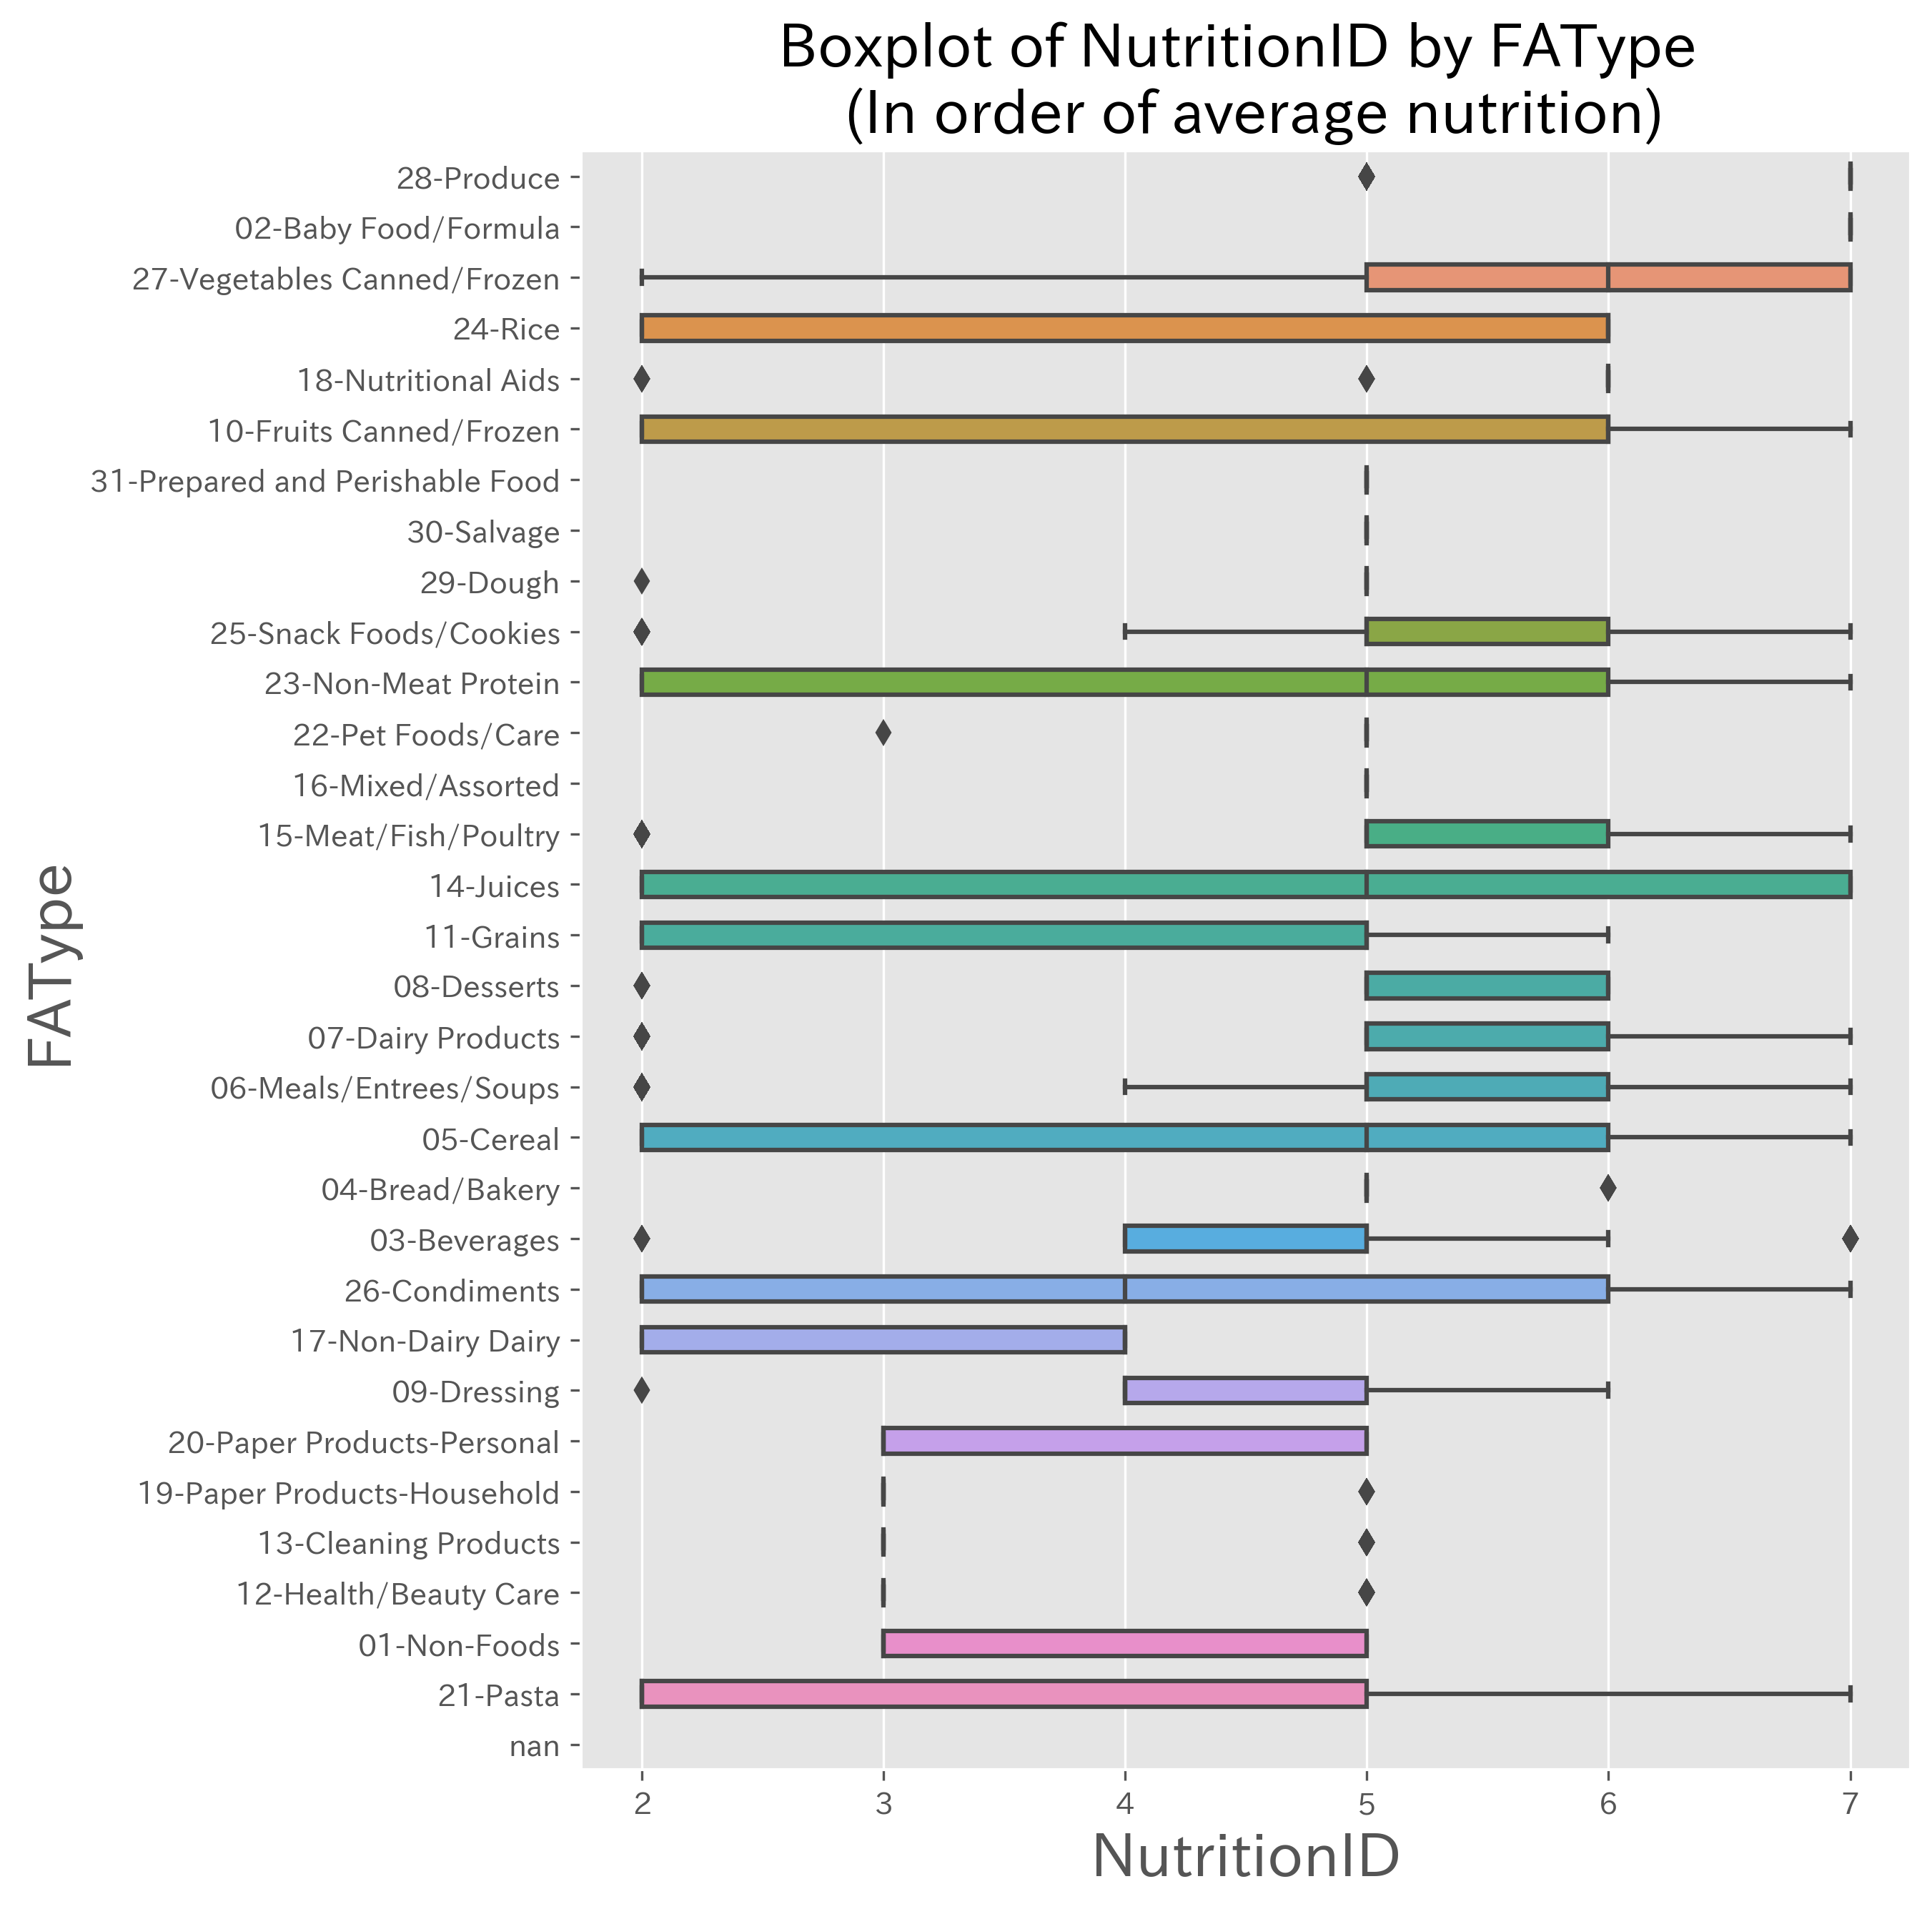

In [97]:
# boxplot

plt.figure(figsize=(8,10), dpi=300)

# Find the order
my_order = list_

sns.boxplot(x=df_["NutritionID"], y=df_["FAType"],width=0.5,order=my_order)

plt.title("Boxplot of NutritionID by FAType \n (In order of average nutrition)",fontsize=20)  
plt.ylabel("FAType",fontsize=20) 
plt.xlabel("NutritionID",fontsize=20) 

# save image
import datetime
now = datetime.datetime.now()
filename = './output/graph_' + now.strftime('%Y%m%d_%H%M%S') + '.png'
plt.savefig(filename, dpi = 300)

plt.show()
